<a href="https://colab.research.google.com/github/iramraja/ML-CW/blob/main/Copy_of_Data_Project_Drug_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Drug_Consumption.csv")

In [3]:
#removing rows with overclaimers
data = data.drop(data[data['Semer'] != 'CL0'].index)

In [4]:
#removing unwanted columns
data = data.drop(['Semer','ID', 'Caff', 'Choc', 'Legalh', 'Nicotine', 'VSA', 'Age','Gender','Education','Country','Ethnicity'], axis=1)


In [5]:
data.head()

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,LSD,Meth,Mushrooms
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL4,CL3,CL0,CL4,CL0,CL2,CL2,CL3,CL0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL3,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL2,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL3,CL0,CL0,CL1,CL0,CL0,CL0,CL0,CL2
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0


In [6]:
pscore = data[["Nscore","Escore","Oscore","AScore","Cscore","Impulsive","SS"]]

In [7]:
pscore

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


In [8]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
s1 = scaler.fit_transform(pscore)
s1 = pd.DataFrame(s1)

In [10]:
s1

,0,1,2,3,4,5,6
0,-0.678606,1.945701,1.444600,0.763830,-0.142714,-0.751123,-0.217292
1,-0.467272,0.809036,-0.848137,-1.626482,-1.016491,-1.451832,0.424524
2,-0.148337,-0.806659,-0.016438,0.592685,0.586655,-1.451832,-1.220824
3,0.737336,-1.636124,-0.450809,-0.302621,1.309579,-0.233229,-0.217292
4,-0.678606,-0.299484,-1.559154,2.047128,1.635102,-1.451832,-1.603213
...,...,...,...,...,...,...,...
1871,-1.195475,1.747221,1.896367,0.763830,-1.140161,0.917814,2.005331
1872,-0.246161,1.747221,0.588815,0.763830,-1.521574,0.917814,0.802941
1873,1.135327,-1.378425,-1.278239,-1.778119,-1.387881,0.549543,-0.539827
1874,0.913095,-1.925226,0.297604,-1.626482,-2.578741,1.348655,1.280536


In [11]:
# not much different using scaling, as range of personality scores is roughly -4 to 4

pscore.describe()

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,-0.000718,-0.001646,-0.002915,-0.000169,-0.000391,0.005412,-0.006782
std,0.998682,0.997596,0.995866,0.996730,0.997923,0.954389,0.961949
min,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.629670,0.637790,0.723300,0.760960,0.628243,0.529750,0.765400
max,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [12]:
dict1 = {
    'CL0':0,
    'CL1':0,
    'CL2':1,
    'CL3':1,
    'CL4':2,
    'CL5':2,
    'CL6':2
}

# 0 = NON-USER
# 1 = OCCASIONAL USER
# 2 = REGULAR USER


#Drug Use: 0 = never used the drug, 1 = used it over a decade ago,
#2 = in the last decade,3 = used in the last year
#4 = used in the last month, 5 = used in the last week, 6 = used in the last day

# **ALCOHOL**

In [13]:
dfalcohol = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Alcohol"]]


In [14]:
dfalcohol

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5


In [15]:
dfalcohol["Alcohol"].replace(dict1, inplace=True)

<ipython-input-15-dc918ba34410>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfalcohol["Alcohol"].replace(dict1, inplace=True)


In [16]:
dfalcohol

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,2
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,2
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,2
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,2
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,2
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,2
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,2


In [17]:
# LOGISTIC REGRESSION ALCOHOL

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
X = dfalcohol.drop('Alcohol', axis=1)  # Features
y = dfalcohol['Alcohol']  # Target variable

In [20]:
X

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


In [21]:
y

0       2
1       2
2       2
3       2
4       1
       ..
1879    2
1880    2
1881    2
1882    2
1883    2
Name: Alcohol, Length: 1876, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LogisticRegression(max_iter=1000)

In [24]:

model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [25]:
y_pred = model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8191489361702128
Confusion Matrix:
[[  0   0  14]
 [  0   0  54]
 [  0   0 308]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        54
           2       0.82      1.00      0.90       308

    accuracy                           0.82       376
   macro avg       0.27      0.33      0.30       376
weighted avg       0.67      0.82      0.74       376



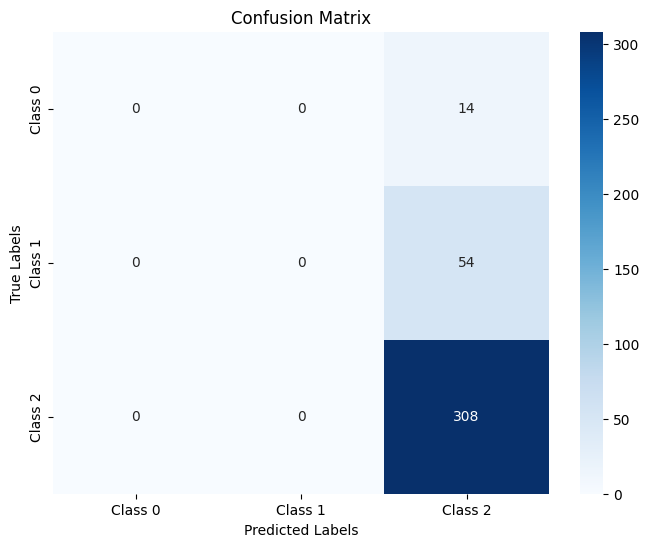

In [28]:

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# Coefficients
print("Alcohol Coefficients:", model.coef_)


Alcohol Coefficients: [[ 0.03123884  0.09865977  0.01707041  0.0716613   0.21979173 -0.05390253
  -0.26561804]
 [-0.05900008 -0.25647897 -0.02094128 -0.04522324 -0.13244573  0.10501759
   0.0761004 ]
 [ 0.02776124  0.1578192   0.00387087 -0.02643806 -0.087346   -0.05111507
   0.18951764]]


In [30]:
# RANDOM FOREST ALCOHOL

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)


In [33]:

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{classification_rep_rf}')

Accuracy: 0.8191489361702128
Confusion Matrix:
[[  0   0  14]
 [  0   1  53]
 [  0   1 307]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.50      0.02      0.04        54
           2       0.82      1.00      0.90       308

    accuracy                           0.82       376
   macro avg       0.44      0.34      0.31       376
weighted avg       0.74      0.82      0.74       376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


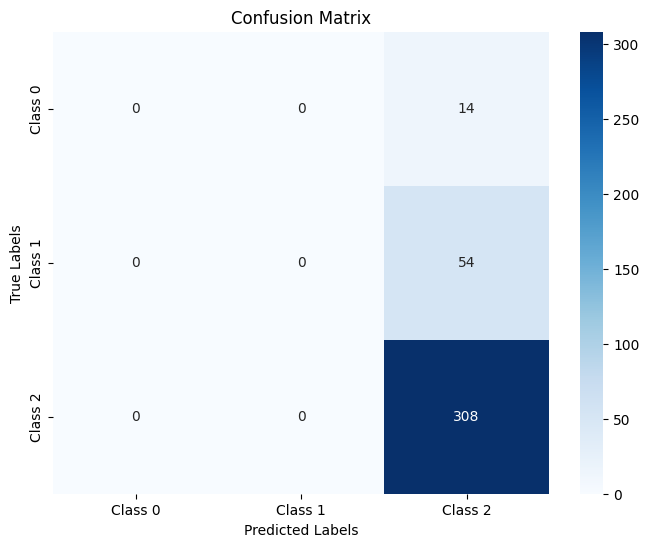

In [34]:
# Create the confusion matrix
cm2 = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# GRADIENT BOOSTING ALCOHOL

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

In [38]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')

Accuracy: 0.8085106382978723
Confusion Matrix:
[[  0   0  14]
 [  0   0  54]
 [  0   4 304]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        54
           2       0.82      0.99      0.89       308

    accuracy                           0.81       376
   macro avg       0.27      0.33      0.30       376
weighted avg       0.67      0.81      0.73       376



# **AMPHET**

In [40]:
# Amphet

dfamphet = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Amphet"]]

dfamphet

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Amphet
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL2
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL1
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL0
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL0
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL6
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL0


In [41]:
dfamphet["Amphet"].replace(dict1, inplace=True)
dfamphet

<ipython-input-41-a56a036823cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfamphet["Amphet"].replace(dict1, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Amphet
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,2
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [42]:
# LOGISTIC REGRESSION

X = dfamphet.drop('Amphet', axis=1)  # Features
y = dfamphet['Amphet']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_amphet = LogisticRegression(max_iter=1000)
lr_amphet.fit(X_train, y_train)
lr_amphet_y_pred = lr_amphet.predict(X_test)

lr_amphet_accuracy = accuracy_score(y_test, lr_amphet_y_pred)
lr_amphet_conf_matrix = confusion_matrix(y_test, lr_amphet_y_pred)
lr_amphet_classification_rep = classification_report(y_test, lr_amphet_y_pred)
print(f'Accuracy: {lr_amphet_accuracy}')
print(f'Confusion Matrix:\n{lr_amphet_conf_matrix}')
print(f'Classification Report:\n{lr_amphet_classification_rep}')

Accuracy: 0.6888297872340425
Confusion Matrix:
[[241  17   4]
 [ 55  14   0]
 [ 28  13   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       262
           1       0.32      0.20      0.25        69
           2       0.50      0.09      0.15        45

    accuracy                           0.69       376
   macro avg       0.52      0.40      0.41       376
weighted avg       0.64      0.69      0.64       376



In [43]:
# Coefficients
print("Amphet Coefficients:", lr_amphet.coef_)

Amphet Coefficients: [[-0.03685581  0.1313663  -0.16629206  0.03300896  0.17878336 -0.10191332
  -0.44912885]
 [-0.02212374 -0.10328229  0.13050023  0.10583944 -0.03876835 -0.1145836
   0.27120285]
 [ 0.05897955 -0.02808401  0.03579183 -0.1388484  -0.14001502  0.21649692
   0.177926  ]]


In [44]:
# RANDOM FOREST
X = dfamphet.drop('Amphet', axis=1)  # Features
y = dfamphet['Amphet']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

amphet_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
amphet_rf_classifier.fit(X_train, y_train)
amphet_y_pred_rf = amphet_rf_classifier.predict(X_test)

amphet_accuracy_rf = accuracy_score(y_test, amphet_y_pred_rf)
amphet_conf_matrix_rf = confusion_matrix(y_test, amphet_y_pred_rf)
amphet_classification_rep_rf = classification_report(y_test, amphet_y_pred_rf)

print(f'Accuracy: {amphet_accuracy_rf}')
print(f'Confusion Matrix:\n{amphet_conf_matrix_rf}')
print(f'Classification Report:\n{amphet_classification_rep_rf}')

Accuracy: 0.6569148936170213
Confusion Matrix:
[[234  24   4]
 [ 56  12   1]
 [ 32  12   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       262
           1       0.25      0.17      0.21        69
           2       0.17      0.02      0.04        45

    accuracy                           0.66       376
   macro avg       0.38      0.36      0.35       376
weighted avg       0.57      0.66      0.60       376



In [45]:
# GRADIENT BOOSTING

amphet_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
amphet_gb_classifier.fit(X_train, y_train)
amphet_y_pred_gb = amphet_gb_classifier.predict(X_test)

amphet_accuracy_gb = accuracy_score(y_test, amphet_y_pred_gb)
amphet_conf_matrix_gb = confusion_matrix(y_test, amphet_y_pred_gb)
amphet_classification_rep_gb = classification_report(y_test, amphet_y_pred_gb)

print(f'Accuracy: {amphet_accuracy_gb}')
print(f'Confusion Matrix:\n{amphet_conf_matrix_gb}')
print(f'Classification Report:\n{amphet_classification_rep_gb}')

Accuracy: 0.6728723404255319
Confusion Matrix:
[[236  21   5]
 [ 54  14   1]
 [ 28  14   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       262
           1       0.29      0.20      0.24        69
           2       0.33      0.07      0.11        45

    accuracy                           0.67       376
   macro avg       0.45      0.39      0.39       376
weighted avg       0.61      0.67      0.62       376



# **AMYL**

In [46]:
# Amyl

dfamyl = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Amyl"]]
dfamyl["Amyl"].replace(dict1, inplace=True)
dfamyl

<ipython-input-46-9bf91464cb10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfamyl["Amyl"].replace(dict1, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Amyl
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,2
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [47]:
# LOGISTIC REGRESSION

X = dfamyl.drop('Amyl', axis=1)  # Features
y = dfamyl['Amyl']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_amyl = LogisticRegression(max_iter=1000)
lr_amyl.fit(X_train, y_train)
lr_amyl_y_pred = lr_amyl.predict(X_test)

lr_amyl_accuracy = accuracy_score(y_test, lr_amyl_y_pred)
lr_amyl_conf_matrix = confusion_matrix(y_test, lr_amyl_y_pred)
lr_amyl_classification_rep = classification_report(y_test, lr_amyl_y_pred)
print(f'Accuracy: {lr_amyl_accuracy}')
print(f'Confusion Matrix:\n{lr_amyl_conf_matrix}')
print(f'Classification Report:\n{lr_amyl_classification_rep}')

Accuracy: 0.8377659574468085
Confusion Matrix:
[[315   0   0]
 [ 60   0   0]
 [  1   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       315
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00         1

    accuracy                           0.84       376
   macro avg       0.28      0.33      0.30       376
weighted avg       0.70      0.84      0.76       376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
# Coefficients
print("Amyl Coefficients:", lr_amyl.coef_)



Amyl Coefficients: [[ 0.08503368  0.03567504  0.08070939  0.04921682  0.11718414  0.04423412
  -0.49571504]
 [ 0.13834934  0.09434446  0.08871674  0.11823256 -0.07100838  0.03671548
  -0.08038372]
 [-0.22338303 -0.1300195  -0.16942613 -0.16744938 -0.04617576 -0.0809496
   0.57609876]]


In [49]:
# RANDOM FOREST
X = dfamyl.drop('Amyl', axis=1)  # Features
y = dfamyl['Amyl']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

amyl_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
amyl_rf_classifier.fit(X_train, y_train)
amyl_y_pred_rf = amyl_rf_classifier.predict(X_test)

amyl_accuracy_rf = accuracy_score(y_test, amyl_y_pred_rf)
amyl_conf_matrix_rf = confusion_matrix(y_test, amyl_y_pred_rf)
amyl_classification_rep_rf = classification_report(y_test, amyl_y_pred_rf)

print(f'Accuracy: {amyl_accuracy_rf}')
print(f'Confusion Matrix:\n{amyl_conf_matrix_rf}')
print(f'Classification Report:\n{amyl_classification_rep_rf}')

Accuracy: 0.8297872340425532
Confusion Matrix:
[[311   4   0]
 [ 59   1   0]
 [  1   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       315
           1       0.20      0.02      0.03        60
           2       0.00      0.00      0.00         1

    accuracy                           0.83       376
   macro avg       0.35      0.33      0.31       376
weighted avg       0.73      0.83      0.76       376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# GRADIENT BOOSTING

amyl_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
amyl_gb_classifier.fit(X_train, y_train)
amyl_y_pred_gb = amyl_gb_classifier.predict(X_test)

amyl_accuracy_gb = accuracy_score(y_test, amyl_y_pred_gb)
amyl_conf_matrix_gb = confusion_matrix(y_test, amyl_y_pred_gb)
amyl_classification_rep_gb = classification_report(y_test, amyl_y_pred_gb)

print(f'Accuracy: {amyl_accuracy_gb}')
print(f'Confusion Matrix:\n{amyl_conf_matrix_gb}')
print(f'Classification Report:\n{amyl_classification_rep_gb}')

Accuracy: 0.8218085106382979
Confusion Matrix:
[[308   7   0]
 [ 59   1   0]
 [  1   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       315
           1       0.12      0.02      0.03        60
           2       0.00      0.00      0.00         1

    accuracy                           0.82       376
   macro avg       0.32      0.33      0.31       376
weighted avg       0.72      0.82      0.76       376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **BENZOS**

In [51]:
# Benzos

dfbenzos = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Benzos"]]
dfbenzos["Benzos"].replace(dict1, inplace=True)
dfbenzos

<ipython-input-51-3d74a12ae4f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbenzos["Benzos"].replace(dict1, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Benzos
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,2
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [52]:
# LOGISTIC REGRESSION

X = dfbenzos.drop('Benzos', axis=1)  # Features
y = dfbenzos['Benzos']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_benzos = LogisticRegression(max_iter=1000)
lr_benzos.fit(X_train, y_train)
lr_benzos_y_pred = lr_benzos.predict(X_test)

lr_benzos_accuracy = accuracy_score(y_test, lr_benzos_y_pred)
lr_benzos_conf_matrix = confusion_matrix(y_test, lr_benzos_y_pred)
lr_benzos_classification_rep = classification_report(y_test, lr_benzos_y_pred)
print(f'Accuracy: {lr_benzos_accuracy}')
print(f'Confusion Matrix:\n{lr_benzos_conf_matrix}')
print(f'Classification Report:\n{lr_benzos_classification_rep}')

Accuracy: 0.6702127659574468
Confusion Matrix:
[[232   7   7]
 [ 58  11  10]
 [ 39   3   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       246
           1       0.52      0.14      0.22        79
           2       0.35      0.18      0.23        51

    accuracy                           0.67       376
   macro avg       0.53      0.42      0.42       376
weighted avg       0.62      0.67      0.61       376



In [53]:
# Coefficients
print("Benzos Coefficients:", lr_benzos.coef_)

Benzos Coefficients: [[-0.30872054  0.09089292 -0.24659053  0.08074678  0.03975076 -0.08034133
  -0.20913144]
 [-0.06928742 -0.03977861  0.13883275  0.03854433 -0.04218481 -0.0032294
   0.00180771]
 [ 0.37800796 -0.05111432  0.10775778 -0.11929111  0.00243405  0.08357073
   0.20732372]]


In [54]:
# RANDOM FOREST
X = dfbenzos.drop('Benzos', axis=1)  # Features
y = dfbenzos['Benzos']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

benzos_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
benzos_rf_classifier.fit(X_train, y_train)
benzos_y_pred_rf = benzos_rf_classifier.predict(X_test)

benzos_accuracy_rf = accuracy_score(y_test, benzos_y_pred_rf)
benzos_conf_matrix_rf = confusion_matrix(y_test, benzos_y_pred_rf)
benzos_classification_rep_rf = classification_report(y_test, benzos_y_pred_rf)

print(f'Accuracy: {benzos_accuracy_rf}')
print(f'Confusion Matrix:\n{benzos_conf_matrix_rf}')
print(f'Classification Report:\n{benzos_classification_rep_rf}')

Accuracy: 0.6196808510638298
Confusion Matrix:
[[211  21  14]
 [ 54  12  13]
 [ 34   7  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.77       246
           1       0.30      0.15      0.20        79
           2       0.27      0.20      0.23        51

    accuracy                           0.62       376
   macro avg       0.43      0.40      0.40       376
weighted avg       0.56      0.62      0.58       376



In [55]:
# GRADIENT BOOSTING

benzos_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
benzos_gb_classifier.fit(X_train, y_train)
benzos_y_pred_gb = benzos_gb_classifier.predict(X_test)

benzos_accuracy_gb = accuracy_score(y_test, benzos_y_pred_gb)
benzos_conf_matrix_gb = confusion_matrix(y_test, benzos_y_pred_gb)
benzos_classification_rep_gb = classification_report(y_test, benzos_y_pred_gb)

print(f'Accuracy: {benzos_accuracy_gb}')
print(f'Confusion Matrix:\n{benzos_conf_matrix_gb}')
print(f'Classification Report:\n{benzos_classification_rep_gb}')

Accuracy: 0.6063829787234043
Confusion Matrix:
[[214  18  14]
 [ 56   8  15]
 [ 34  11   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       246
           1       0.22      0.10      0.14        79
           2       0.17      0.12      0.14        51

    accuracy                           0.61       376
   macro avg       0.36      0.36      0.35       376
weighted avg       0.53      0.61      0.56       376



# **CANNABIS**

In [56]:
# Cannabis

dfcannabis = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Cannabis"]]
dfcannabis["Cannabis"].replace(dict1, inplace=True)
dfcannabis

<ipython-input-56-630a20318f92>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcannabis["Cannabis"].replace(dict1, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Cannabis
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,2
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,2
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,2


In [57]:
# LOGISTIC REGRESSION

X = dfcannabis.drop('Cannabis', axis=1)  # Features
y = dfcannabis['Cannabis']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_cannabis = LogisticRegression(max_iter=1000)
lr_cannabis.fit(X_train, y_train)
lr_cannabis_y_pred = lr_cannabis.predict(X_test)

lr_cannabis_accuracy = accuracy_score(y_test, lr_cannabis_y_pred)
lr_cannabis_conf_matrix = confusion_matrix(y_test, lr_cannabis_y_pred)
lr_cannabis_classification_rep = classification_report(y_test, lr_cannabis_y_pred)
print(f'Accuracy: {lr_cannabis_accuracy}')
print(f'Confusion Matrix:\n{lr_cannabis_conf_matrix}')
print(f'Classification Report:\n{lr_cannabis_classification_rep}')

Accuracy: 0.6329787234042553
Confusion Matrix:
[[106   3  32]
 [ 30   6  46]
 [ 18   9 126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       141
           1       0.33      0.07      0.12        82
           2       0.62      0.82      0.71       153

    accuracy                           0.63       376
   macro avg       0.55      0.55      0.51       376
weighted avg       0.58      0.63      0.58       376



In [58]:
# Coefficients
print("Cannabis Coefficients:", lr_cannabis.coef_)

Cannabis Coefficients: [[ 2.89330942e-02  1.94775557e-01 -4.62987812e-01  1.20838604e-01
   2.67233145e-01 -1.42797699e-02 -5.10140243e-01]
 [ 1.10445621e-01 -3.72299064e-02 -1.87336753e-02 -4.22592748e-02
  -3.05694685e-02  1.46216725e-02 -3.73640199e-03]
 [-1.39378715e-01 -1.57545651e-01  4.81721487e-01 -7.85793291e-02
  -2.36663676e-01 -3.41902616e-04  5.13876645e-01]]


In [59]:
# RANDOM FOREST
X = dfcannabis.drop('Cannabis', axis=1)  # Features
y = dfcannabis['Cannabis']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cannabis_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
cannabis_rf_classifier.fit(X_train, y_train)
cannabis_y_pred_rf = cannabis_rf_classifier.predict(X_test)

cannabis_accuracy_rf = accuracy_score(y_test, cannabis_y_pred_rf)
cannabis_conf_matrix_rf = confusion_matrix(y_test, cannabis_y_pred_rf)
cannabis_classification_rep_rf = classification_report(y_test, cannabis_y_pred_rf)

print(f'Accuracy: {cannabis_accuracy_rf}')
print(f'Confusion Matrix:\n{cannabis_conf_matrix_rf}')
print(f'Classification Report:\n{cannabis_classification_rep_rf}')

Accuracy: 0.6170212765957447
Confusion Matrix:
[[101  14  26]
 [ 23  15  44]
 [ 23  14 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       141
           1       0.35      0.18      0.24        82
           2       0.62      0.76      0.68       153

    accuracy                           0.62       376
   macro avg       0.55      0.55      0.54       376
weighted avg       0.59      0.62      0.59       376



In [60]:
# GRADIENT BOOSTING

cannabis_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
cannabis_gb_classifier.fit(X_train, y_train)
cannabis_y_pred_gb = cannabis_gb_classifier.predict(X_test)

cannabis_accuracy_gb = accuracy_score(y_test, cannabis_y_pred_gb)
cannabis_conf_matrix_gb = confusion_matrix(y_test, cannabis_y_pred_gb)
cannabis_classification_rep_gb = classification_report(y_test, cannabis_y_pred_gb)

print(f'Accuracy: {cannabis_accuracy_gb}')
print(f'Confusion Matrix:\n{cannabis_conf_matrix_gb}')
print(f'Classification Report:\n{cannabis_classification_rep_gb}')

Accuracy: 0.6382978723404256
Confusion Matrix:
[[107   8  26]
 [ 21  15  46]
 [ 23  12 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       141
           1       0.43      0.18      0.26        82
           2       0.62      0.77      0.69       153

    accuracy                           0.64       376
   macro avg       0.59      0.57      0.56       376
weighted avg       0.61      0.64      0.61       376



# **COKE**

In [61]:
# Coke

dfcoke = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Coke"]]
dfcoke["Coke"].replace(dict1, inplace=True)
dfcoke

<ipython-input-61-797f1b856aba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcoke["Coke"].replace(dict1, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Coke
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,2
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [62]:
# LOGISTIC REGRESSION

X = dfcoke.drop('Coke', axis=1)  # Features
y = dfcoke['Coke']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_coke = LogisticRegression(max_iter=1000)
lr_coke.fit(X_train, y_train)
lr_coke_y_pred = lr_coke.predict(X_test)

lr_coke_accuracy = accuracy_score(y_test, lr_coke_y_pred)
lr_coke_conf_matrix = confusion_matrix(y_test, lr_coke_y_pred)
lr_coke_classification_rep = classification_report(y_test, lr_coke_y_pred)
print(f'Accuracy: {lr_coke_accuracy}')
print(f'Confusion Matrix:\n{lr_coke_conf_matrix}')
print(f'Classification Report:\n{lr_coke_classification_rep}')

Accuracy: 0.6914893617021277
Confusion Matrix:
[[237  23   1]
 [ 70  23   0]
 [ 14   8   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.91      0.81       261
           1       0.43      0.25      0.31        93
           2       0.00      0.00      0.00        22

    accuracy                           0.69       376
   macro avg       0.39      0.39      0.38       376
weighted avg       0.62      0.69      0.64       376



In [63]:
# Coefficients
print("Coke Coefficients:", lr_coke.coef_)

Coke Coefficients: [[-0.1358637  -0.02784255 -0.10746776  0.16642738  0.101069   -0.06040435
  -0.46442195]
 [-0.03780456 -0.11041771  0.14024921  0.04285582 -0.07939235  0.06352456
   0.02861136]
 [ 0.17366826  0.13826025 -0.03278145 -0.20928321 -0.02167665 -0.0031202
   0.43581059]]


In [64]:
# RANDOM FOREST
X = dfcoke.drop('Coke', axis=1)  # Features
y = dfcoke['Coke']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

coke_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
coke_rf_classifier.fit(X_train, y_train)
coke_y_pred_rf = coke_rf_classifier.predict(X_test)

coke_accuracy_rf = accuracy_score(y_test, coke_y_pred_rf)
coke_conf_matrix_rf = confusion_matrix(y_test, coke_y_pred_rf)
coke_classification_rep_rf = classification_report(y_test, coke_y_pred_rf)

print(f'Accuracy: {coke_accuracy_rf}')
print(f'Confusion Matrix:\n{coke_conf_matrix_rf}')
print(f'Classification Report:\n{coke_classification_rep_rf}')

Accuracy: 0.6702127659574468
Confusion Matrix:
[[224  35   2]
 [ 62  28   3]
 [ 18   4   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       261
           1       0.42      0.30      0.35        93
           2       0.00      0.00      0.00        22

    accuracy                           0.67       376
   macro avg       0.38      0.39      0.38       376
weighted avg       0.61      0.67      0.64       376



In [65]:
# GRADIENT BOOSTING

coke_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
coke_gb_classifier.fit(X_train, y_train)
coke_y_pred_gb = coke_gb_classifier.predict(X_test)

coke_accuracy_gb = accuracy_score(y_test, coke_y_pred_gb)
coke_conf_matrix_gb = confusion_matrix(y_test, coke_y_pred_gb)
coke_classification_rep_gb = classification_report(y_test, coke_y_pred_gb)

print(f'Accuracy: {coke_accuracy_gb}')
print(f'Confusion Matrix:\n{coke_conf_matrix_gb}')
print(f'Classification Report:\n{coke_classification_rep_gb}')

Accuracy: 0.6675531914893617
Confusion Matrix:
[[223  34   4]
 [ 62  27   4]
 [ 15   6   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.80       261
           1       0.40      0.29      0.34        93
           2       0.11      0.05      0.06        22

    accuracy                           0.67       376
   macro avg       0.42      0.40      0.40       376
weighted avg       0.62      0.67      0.64       376



# **CRACK**

In [66]:
# Crack

dfcrack = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Crack"]]
dfcrack["Crack"].replace(dict1, inplace=True)
dfcrack

<ipython-input-66-710ba74fbc08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcrack["Crack"].replace(dict1, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Crack
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [67]:
# LOGISTIC REGRESSION

X = dfcrack.drop('Crack', axis=1)  # Features
y = dfcrack['Crack']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_crack = LogisticRegression(max_iter=1000)
lr_crack.fit(X_train, y_train)
lr_crack_y_pred = lr_crack.predict(X_test)

lr_crack_accuracy = accuracy_score(y_test, lr_crack_y_pred)
lr_crack_conf_matrix = confusion_matrix(y_test, lr_crack_y_pred)
lr_crack_classification_rep = classification_report(y_test, lr_crack_y_pred)
print(f'Accuracy: {lr_crack_accuracy}')
print(f'Confusion Matrix:\n{lr_crack_conf_matrix}')
print(f'Classification Report:\n{lr_crack_classification_rep}')

Accuracy: 0.9228723404255319
Confusion Matrix:
[[347   0   0]
 [ 28   0   0]
 [  1   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       347
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00         1

    accuracy                           0.92       376
   macro avg       0.31      0.33      0.32       376
weighted avg       0.85      0.92      0.89       376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
# Coefficients
print("Crack Coefficients:", lr_crack.coef_)

Crack Coefficients: [[-0.19095758  0.18612447 -0.05467189  0.15125884  0.01766137 -0.20742426
  -0.295463  ]
 [-0.16655807 -0.07211317  0.17401285  0.07494658 -0.08376056  0.17520936
   0.00466195]
 [ 0.35751565 -0.1140113  -0.11934096 -0.22620542  0.06609918  0.0322149
   0.29080105]]


In [69]:
# RANDOM FOREST
X = dfcrack.drop('Crack', axis=1)  # Features
y = dfcrack['Crack']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

crack_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
crack_rf_classifier.fit(X_train, y_train)
crack_y_pred_rf = crack_rf_classifier.predict(X_test)

crack_accuracy_rf = accuracy_score(y_test, crack_y_pred_rf)
crack_conf_matrix_rf = confusion_matrix(y_test, crack_y_pred_rf)
crack_classification_rep_rf = classification_report(y_test, crack_y_pred_rf)

print(f'Accuracy: {crack_accuracy_rf}')
print(f'Confusion Matrix:\n{crack_conf_matrix_rf}')
print(f'Classification Report:\n{crack_classification_rep_rf}')

Accuracy: 0.9148936170212766
Confusion Matrix:
[[344   3   0]
 [ 28   0   0]
 [  1   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       347
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00         1

    accuracy                           0.91       376
   macro avg       0.31      0.33      0.32       376
weighted avg       0.85      0.91      0.88       376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
# GRADIENT BOOSTING

crack_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
crack_gb_classifier.fit(X_train, y_train)
crack_y_pred_gb = crack_gb_classifier.predict(X_test)

crack_accuracy_gb = accuracy_score(y_test, crack_y_pred_gb)
crack_conf_matrix_gb = confusion_matrix(y_test, crack_y_pred_gb)
crack_classification_rep_gb = classification_report(y_test, crack_y_pred_gb)

print(f'Accuracy: {crack_accuracy_gb}')
print(f'Confusion Matrix:\n{crack_conf_matrix_gb}')
print(f'Classification Report:\n{crack_classification_rep_gb}')

Accuracy: 0.9122340425531915
Confusion Matrix:
[[341   5   1]
 [ 26   2   0]
 [  1   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       347
           1       0.29      0.07      0.11        28
           2       0.00      0.00      0.00         1

    accuracy                           0.91       376
   macro avg       0.40      0.35      0.36       376
weighted avg       0.88      0.91      0.89       376



# **ECSTASY**

In [71]:
# Ecstasy

dfecstasy = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Ecstasy"]]
dfecstasy["Ecstasy"].replace(dict1, inplace=True)
dfecstasy

<ipython-input-71-3c44264a80c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfecstasy["Ecstasy"].replace(dict1, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Ecstasy
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,2
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


In [72]:
# LOGISTIC REGRESSION

X = dfecstasy.drop('Ecstasy', axis=1)  # Features
y = dfecstasy['Ecstasy']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_ecstasy = LogisticRegression(max_iter=1000)
lr_ecstasy.fit(X_train, y_train)
lr_ecstasy_y_pred = lr_ecstasy.predict(X_test)

lr_ecstasy_accuracy = accuracy_score(y_test, lr_ecstasy_y_pred)
lr_ecstasy_conf_matrix = confusion_matrix(y_test, lr_ecstasy_y_pred)
lr_ecstasy_classification_rep = classification_report(y_test, lr_ecstasy_y_pred)
print(f'Accuracy: {lr_ecstasy_accuracy}')
print(f'Confusion Matrix:\n{lr_ecstasy_conf_matrix}')
print(f'Classification Report:\n{lr_ecstasy_classification_rep}')

Accuracy: 0.675531914893617
Confusion Matrix:
[[220  24   0]
 [ 52  34   2]
 [ 26  18   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       244
           1       0.45      0.39      0.41        88
           2       0.00      0.00      0.00        44

    accuracy                           0.68       376
   macro avg       0.40      0.43      0.41       376
weighted avg       0.58      0.68      0.62       376



In [73]:
# Coefficients
print("Ecstasy Coefficients:", lr_ecstasy.coef_)

Ecstasy Coefficients: [[ 0.00879913  0.0021496  -0.26518179  0.0568384   0.24027895  0.04610964
  -0.53652934]
 [ 0.10003887 -0.07746512  0.10671984  0.03899664 -0.1034934  -0.00483934
   0.20280667]
 [-0.108838    0.07531551  0.15846196 -0.09583505 -0.13678556 -0.04127029
   0.33372267]]


In [74]:
# RANDOM FOREST
X = dfecstasy.drop('Ecstasy', axis=1)  # Features
y = dfecstasy['Ecstasy']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ecstasy_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
ecstasy_rf_classifier.fit(X_train, y_train)
ecstasy_y_pred_rf = ecstasy_rf_classifier.predict(X_test)

ecstasy_accuracy_rf = accuracy_score(y_test, ecstasy_y_pred_rf)
ecstasy_conf_matrix_rf = confusion_matrix(y_test, ecstasy_y_pred_rf)
ecstasy_classification_rep_rf = classification_report(y_test, ecstasy_y_pred_rf)

print(f'Accuracy: {ecstasy_accuracy_rf}')
print(f'Confusion Matrix:\n{ecstasy_conf_matrix_rf}')
print(f'Classification Report:\n{ecstasy_classification_rep_rf}')

Accuracy: 0.675531914893617
Confusion Matrix:
[[212  29   3]
 [ 49  38   1]
 [ 22  18   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       244
           1       0.45      0.43      0.44        88
           2       0.50      0.09      0.15        44

    accuracy                           0.68       376
   macro avg       0.57      0.46      0.47       376
weighted avg       0.65      0.68      0.64       376



In [75]:
# GRADIENT BOOSTING

ecstasy_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
ecstasy_gb_classifier.fit(X_train, y_train)
ecstasy_y_pred_gb = ecstasy_gb_classifier.predict(X_test)

ecstasy_accuracy_gb = accuracy_score(y_test, ecstasy_y_pred_gb)
ecstasy_conf_matrix_gb = confusion_matrix(y_test, ecstasy_y_pred_gb)
ecstasy_classification_rep_gb = classification_report(y_test, ecstasy_y_pred_gb)

print(f'Accuracy: {ecstasy_accuracy_gb}')
print(f'Confusion Matrix:\n{ecstasy_conf_matrix_gb}')
print(f'Classification Report:\n{ecstasy_classification_rep_gb}')

Accuracy: 0.6409574468085106
Confusion Matrix:
[[202  38   4]
 [ 45  37   6]
 [ 22  20   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       244
           1       0.39      0.42      0.40        88
           2       0.17      0.05      0.07        44

    accuracy                           0.64       376
   macro avg       0.44      0.43      0.42       376
weighted avg       0.60      0.64      0.61       376



# **HEROIN**

In [76]:
# Heroin

dfheroin = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Heroin"]]
dfheroin["Heroin"].replace(dict1, inplace=True)
dfheroin

<ipython-input-76-65e9d27501bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfheroin["Heroin"].replace(dict1, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Heroin
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [77]:
# LOGISTIC REGRESSION

X = dfheroin.drop('Heroin', axis=1)  # Features
y = dfheroin['Heroin']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_heroin = LogisticRegression(max_iter=1000)
lr_heroin.fit(X_train, y_train)
lr_heroin_y_pred = lr_heroin.predict(X_test)

lr_heroin_accuracy = accuracy_score(y_test, lr_heroin_y_pred)
lr_heroin_conf_matrix = confusion_matrix(y_test, lr_heroin_y_pred)
lr_heroin_classification_rep = classification_report(y_test, lr_heroin_y_pred)
print(f'Accuracy: {lr_heroin_accuracy}')
print(f'Confusion Matrix:\n{lr_heroin_conf_matrix}')
print(f'Classification Report:\n{lr_heroin_classification_rep}')

Accuracy: 0.9175531914893617
Confusion Matrix:
[[345   1   1]
 [ 26   0   1]
 [  2   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       347
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00         2

    accuracy                           0.92       376
   macro avg       0.31      0.33      0.32       376
weighted avg       0.85      0.92      0.88       376



In [78]:
# Coefficients
print("Heroin Coefficients:", lr_heroin.coef_)

Heroin Coefficients: [[-0.18076839  0.20226381 -0.22323076  0.24623588  0.06612007 -0.15855761
  -0.32839836]
 [ 0.11199584  0.0751156   0.22927167  0.0527485   0.0589943   0.09992349
   0.00080338]
 [ 0.06877256 -0.27737941 -0.00604091 -0.29898438 -0.12511437  0.05863412
   0.32759498]]


In [79]:
# RANDOM FOREST
X = dfheroin.drop('Heroin', axis=1)  # Features
y = dfheroin['Heroin']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

heroin_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
heroin_rf_classifier.fit(X_train, y_train)
heroin_y_pred_rf = heroin_rf_classifier.predict(X_test)

heroin_accuracy_rf = accuracy_score(y_test, heroin_y_pred_rf)
heroin_conf_matrix_rf = confusion_matrix(y_test, heroin_y_pred_rf)
heroin_classification_rep_rf = classification_report(y_test, heroin_y_pred_rf)

print(f'Accuracy: {heroin_accuracy_rf}')
print(f'Confusion Matrix:\n{heroin_conf_matrix_rf}')
print(f'Classification Report:\n{heroin_classification_rep_rf}')

Accuracy: 0.9202127659574468
Confusion Matrix:
[[345   0   2]
 [ 26   1   0]
 [  2   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       347
           1       1.00      0.04      0.07        27
           2       0.00      0.00      0.00         2

    accuracy                           0.92       376
   macro avg       0.64      0.34      0.34       376
weighted avg       0.93      0.92      0.89       376



In [80]:
# GRADIENT BOOSTING

heroin_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
heroin_gb_classifier.fit(X_train, y_train)
heroin_y_pred_gb = heroin_gb_classifier.predict(X_test)

heroin_accuracy_gb = accuracy_score(y_test, heroin_y_pred_gb)
heroin_conf_matrix_gb = confusion_matrix(y_test, heroin_y_pred_gb)
heroin_classification_rep_gb = classification_report(y_test, heroin_y_pred_gb)

print(f'Accuracy: {heroin_accuracy_gb}')
print(f'Confusion Matrix:\n{heroin_conf_matrix_gb}')
print(f'Classification Report:\n{heroin_classification_rep_gb}')

Accuracy: 0.9069148936170213
Confusion Matrix:
[[341   2   4]
 [ 26   0   1]
 [  2   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       347
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00         2

    accuracy                           0.91       376
   macro avg       0.31      0.33      0.32       376
weighted avg       0.85      0.91      0.88       376



# **KETAMINE**

In [81]:
# Ketamine

dfket = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Ketamine"]]
dfket["Ketamine"].replace(dict1, inplace=True)
dfket

<ipython-input-81-a52e591d18bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfket["Ketamine"].replace(dict1, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Ketamine
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [82]:
# LOGISTIC REGRESSION

X = dfket.drop('Ketamine', axis=1)  # Features
y = dfket['Ketamine']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_ket = LogisticRegression(max_iter=1000)
lr_ket.fit(X_train, y_train)
lr_ket_y_pred = lr_ket.predict(X_test)

lr_ket_accuracy = accuracy_score(y_test, lr_ket_y_pred)
lr_ket_conf_matrix = confusion_matrix(y_test, lr_ket_y_pred)
lr_ket_classification_rep = classification_report(y_test, lr_ket_y_pred)
print(f'Accuracy: {lr_ket_accuracy}')
print(f'Confusion Matrix:\n{lr_ket_conf_matrix}')
print(f'Classification Report:\n{lr_ket_classification_rep}')

Accuracy: 0.824468085106383
Confusion Matrix:
[[310   0   0]
 [ 54   0   0]
 [ 12   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       310
           1       0.00      0.00      0.00        54
           2       0.00      0.00      0.00        12

    accuracy                           0.82       376
   macro avg       0.27      0.33      0.30       376
weighted avg       0.68      0.82      0.75       376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
# Coefficients
print("Ketamine Coefficients:", lr_ket.coef_)

Ketamine Coefficients: [[ 0.02020655  0.04377232 -0.29795822  0.11031279  0.26214119  0.00048091
  -0.24584338]
 [ 0.0826014   0.01049129 -0.02191951  0.02757774  0.10965891  0.09088556
   0.230759  ]
 [-0.10280795 -0.05426362  0.31987774 -0.13789053 -0.3718001  -0.09136647
   0.01508439]]


In [84]:
# RANDOM FOREST
X = dfket.drop('Ketamine', axis=1)  # Features
y = dfket['Ketamine']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ket_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
ket_rf_classifier.fit(X_train, y_train)
ket_y_pred_rf = ket_rf_classifier.predict(X_test)

ket_accuracy_rf = accuracy_score(y_test, ket_y_pred_rf)
ket_conf_matrix_rf = confusion_matrix(y_test, ket_y_pred_rf)
ket_classification_rep_rf = classification_report(y_test, ket_y_pred_rf)

print(f'Accuracy: {ket_accuracy_rf}')
print(f'Confusion Matrix:\n{ket_conf_matrix_rf}')
print(f'Classification Report:\n{ket_classification_rep_rf}')

Accuracy: 0.824468085106383
Confusion Matrix:
[[308   2   0]
 [ 52   2   0]
 [ 12   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       310
           1       0.50      0.04      0.07        54
           2       0.00      0.00      0.00        12

    accuracy                           0.82       376
   macro avg       0.44      0.34      0.32       376
weighted avg       0.75      0.82      0.75       376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
# GRADIENT BOOSTING

ket_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
ket_gb_classifier.fit(X_train, y_train)
ket_y_pred_gb = ket_gb_classifier.predict(X_test)

ket_accuracy_gb = accuracy_score(y_test, ket_y_pred_gb)
ket_conf_matrix_gb = confusion_matrix(y_test, ket_y_pred_gb)
ket_classification_rep_gb = classification_report(y_test, ket_y_pred_gb)

print(f'Accuracy: {ket_accuracy_gb}')
print(f'Confusion Matrix:\n{ket_conf_matrix_gb}')
print(f'Classification Report:\n{ket_classification_rep_gb}')

Accuracy: 0.8058510638297872
Confusion Matrix:
[[303   6   1]
 [ 53   0   1]
 [ 11   1   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       310
           1       0.00      0.00      0.00        54
           2       0.00      0.00      0.00        12

    accuracy                           0.81       376
   macro avg       0.28      0.33      0.30       376
weighted avg       0.68      0.81      0.74       376



# **LSD**

In [86]:
# LSD

dflsd = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"LSD"]]
dflsd["LSD"].replace(dict1, inplace=True)
dflsd

<ipython-input-86-70aa0993dd20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflsd["LSD"].replace(dict1, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,LSD
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,2
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


In [87]:
# LOGISTIC REGRESSION

X = dflsd.drop('LSD', axis=1)  # Features
y = dflsd['LSD']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_lsd = LogisticRegression(max_iter=1000)
lr_lsd.fit(X_train, y_train)
lr_lsd_y_pred = lr_lsd.predict(X_test)

lr_lsd_accuracy = accuracy_score(y_test, lr_lsd_y_pred)
lr_lsd_conf_matrix = confusion_matrix(y_test, lr_lsd_y_pred)
lr_lsd_classification_rep = classification_report(y_test, lr_lsd_y_pred)
print(f'Accuracy: {lr_lsd_accuracy}')
print(f'Confusion Matrix:\n{lr_lsd_conf_matrix}')
print(f'Classification Report:\n{lr_lsd_classification_rep}')

Accuracy: 0.7287234042553191
Confusion Matrix:
[[258  13   1]
 [ 59  15   1]
 [ 16  12   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       272
           1       0.38      0.20      0.26        75
           2       0.33      0.03      0.06        29

    accuracy                           0.73       376
   macro avg       0.49      0.39      0.39       376
weighted avg       0.66      0.73      0.67       376



In [88]:
# Coefficients
print("LSD Coefficients:", lr_lsd.coef_)

LSD Coefficients: [[ 0.06984903  0.15486054 -0.55710758  0.07705384  0.14626751  0.09641775
  -0.47749458]
 [-0.10132563 -0.2171019   0.10947294 -0.06253458  0.03839135  0.10985058
   0.23379247]
 [ 0.0314766   0.06224135  0.44763465 -0.01451926 -0.18465886 -0.20626833
   0.24370211]]


In [89]:
# RANDOM FOREST
X = dflsd.drop('LSD', axis=1)  # Features
y = dflsd['LSD']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lsd_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
lsd_rf_classifier.fit(X_train, y_train)
lsd_y_pred_rf = lsd_rf_classifier.predict(X_test)

lsd_accuracy_rf = accuracy_score(y_test, lsd_y_pred_rf)
lsd_conf_matrix_rf = confusion_matrix(y_test, lsd_y_pred_rf)
lsd_classification_rep_rf = classification_report(y_test, lsd_y_pred_rf)

print(f'Accuracy: {lsd_accuracy_rf}')
print(f'Confusion Matrix:\n{lsd_conf_matrix_rf}')
print(f'Classification Report:\n{lsd_classification_rep_rf}')

Accuracy: 0.7287234042553191
Confusion Matrix:
[[257  15   0]
 [ 56  17   2]
 [ 19  10   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       272
           1       0.40      0.23      0.29        75
           2       0.00      0.00      0.00        29

    accuracy                           0.73       376
   macro avg       0.39      0.39      0.38       376
weighted avg       0.64      0.73      0.67       376



In [90]:
# GRADIENT BOOSTING

lsd_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lsd_gb_classifier.fit(X_train, y_train)
lsd_y_pred_gb = lsd_gb_classifier.predict(X_test)

lsd_accuracy_gb = accuracy_score(y_test, lsd_y_pred_gb)
lsd_conf_matrix_gb = confusion_matrix(y_test, lsd_y_pred_gb)
lsd_classification_rep_gb = classification_report(y_test, lsd_y_pred_gb)

print(f'Accuracy: {lsd_accuracy_gb}')
print(f'Confusion Matrix:\n{lsd_conf_matrix_gb}')
print(f'Classification Report:\n{lsd_classification_rep_gb}')

Accuracy: 0.7207446808510638
Confusion Matrix:
[[251  17   4]
 [ 53  20   2]
 [ 19  10   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       272
           1       0.43      0.27      0.33        75
           2       0.00      0.00      0.00        29

    accuracy                           0.72       376
   macro avg       0.40      0.40      0.39       376
weighted avg       0.65      0.72      0.68       376



# **METH**

In [91]:
# Meth

dfmeth = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Meth"]]
dfmeth["Meth"].replace(dict1, inplace=True)
dfmeth

<ipython-input-91-0cbff31469ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmeth["Meth"].replace(dict1, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Meth
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,2
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [92]:
# LOGISTIC REGRESSION

X = dfmeth.drop('Meth', axis=1)  # Features
y = dfmeth['Meth']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_meth = LogisticRegression(max_iter=1000)
lr_meth.fit(X_train, y_train)
lr_meth_y_pred = lr_meth.predict(X_test)

lr_meth_accuracy = accuracy_score(y_test, lr_meth_y_pred)
lr_meth_conf_matrix = confusion_matrix(y_test, lr_meth_y_pred)
lr_meth_classification_rep = classification_report(y_test, lr_meth_y_pred)
print(f'Accuracy: {lr_meth_accuracy}')
print(f'Confusion Matrix:\n{lr_meth_conf_matrix}')
print(f'Classification Report:\n{lr_meth_classification_rep}')

Accuracy: 0.7819148936170213
Confusion Matrix:
[[290   4   1]
 [ 48   2   1]
 [ 27   1   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       295
           1       0.29      0.04      0.07        51
           2       0.50      0.07      0.12        30

    accuracy                           0.78       376
   macro avg       0.53      0.36      0.36       376
weighted avg       0.70      0.78      0.71       376



In [93]:
# Coefficients
print("Meth Coefficients:", lr_meth.coef_)

Meth Coefficients: [[-0.14571889  0.20443457 -0.31448232  0.16191964  0.09532128 -0.07719494
  -0.24868914]
 [-0.00949554 -0.11055916  0.26857074 -0.01968992 -0.03314773  0.06357516
   0.03277249]
 [ 0.15521443 -0.09387541  0.04591158 -0.14222972 -0.06217356  0.01361978
   0.21591664]]


In [94]:
# RANDOM FOREST
X = dfmeth.drop('Meth', axis=1)  # Features
y = dfmeth['Meth']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

meth_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
meth_rf_classifier.fit(X_train, y_train)
meth_y_pred_rf = meth_rf_classifier.predict(X_test)

meth_accuracy_rf = accuracy_score(y_test, meth_y_pred_rf)
meth_conf_matrix_rf = confusion_matrix(y_test, meth_y_pred_rf)
meth_classification_rep_rf = classification_report(y_test, meth_y_pred_rf)

print(f'Accuracy: {meth_accuracy_rf}')
print(f'Confusion Matrix:\n{meth_conf_matrix_rf}')
print(f'Classification Report:\n{meth_classification_rep_rf}')

Accuracy: 0.7686170212765957
Confusion Matrix:
[[286   6   3]
 [ 49   1   1]
 [ 28   0   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       295
           1       0.14      0.02      0.03        51
           2       0.33      0.07      0.11        30

    accuracy                           0.77       376
   macro avg       0.42      0.35      0.34       376
weighted avg       0.66      0.77      0.70       376



In [95]:
# GRADIENT BOOSTING

meth_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
meth_gb_classifier.fit(X_train, y_train)
meth_y_pred_gb = meth_gb_classifier.predict(X_test)

meth_accuracy_gb = accuracy_score(y_test, meth_y_pred_gb)
meth_conf_matrix_gb = confusion_matrix(y_test, meth_y_pred_gb)
meth_classification_rep_gb = classification_report(y_test, meth_y_pred_gb)

print(f'Accuracy: {meth_accuracy_gb}')
print(f'Confusion Matrix:\n{meth_conf_matrix_gb}')
print(f'Classification Report:\n{meth_classification_rep_gb}')

Accuracy: 0.7632978723404256
Confusion Matrix:
[[284   7   4]
 [ 48   1   2]
 [ 28   0   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       295
           1       0.12      0.02      0.03        51
           2       0.25      0.07      0.11        30

    accuracy                           0.76       376
   macro avg       0.39      0.35      0.34       376
weighted avg       0.66      0.76      0.69       376



# **MUSHROOMS**

In [96]:
# Meth

dfmush = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Mushrooms"]]
dfmush["Mushrooms"].replace(dict1, inplace=True)
dfmush

<ipython-input-96-f9cb9da68014>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmush["Mushrooms"].replace(dict1, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Mushrooms
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,2
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


In [97]:
# LOGISTIC REGRESSION

X = dfmush.drop('Mushrooms', axis=1)  # Features
y = dfmush['Mushrooms']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_mush = LogisticRegression(max_iter=1000)
lr_mush.fit(X_train, y_train)
lr_mush_y_pred = lr_mush.predict(X_test)

lr_mush_accuracy = accuracy_score(y_test, lr_mush_y_pred)
lr_mush_conf_matrix = confusion_matrix(y_test, lr_mush_y_pred)
lr_mush_classification_rep = classification_report(y_test, lr_mush_y_pred)
print(f'Accuracy: {lr_mush_accuracy}')
print(f'Confusion Matrix:\n{lr_mush_conf_matrix}')
print(f'Classification Report:\n{lr_mush_classification_rep}')

Accuracy: 0.6648936170212766
Confusion Matrix:
[[216  23   1]
 [ 67  34   1]
 [ 18  16   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       240
           1       0.47      0.33      0.39       102
           2       0.00      0.00      0.00        34

    accuracy                           0.66       376
   macro avg       0.39      0.41      0.40       376
weighted avg       0.58      0.66      0.62       376



In [98]:
# Coefficients
print("Mushrooms Coefficients:", lr_mush.coef_)

Mushrooms Coefficients: [[ 0.13646433  0.16048203 -0.54562933  0.08064359  0.18780943 -0.01771898
  -0.38747045]
 [-0.02155788 -0.03479548 -0.00950812 -0.02100549 -0.08698834  0.04780316
   0.14944364]
 [-0.11490644 -0.12568655  0.55513744 -0.0596381  -0.10082108 -0.03008418
   0.23802681]]


In [99]:
# RANDOM FOREST
X = dfmush.drop('Mushrooms', axis=1)  # Features
y = dfmush['Mushrooms']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mush_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
mush_rf_classifier.fit(X_train, y_train)
mush_y_pred_rf = mush_rf_classifier.predict(X_test)

mush_accuracy_rf = accuracy_score(y_test, mush_y_pred_rf)
mush_conf_matrix_rf = confusion_matrix(y_test, mush_y_pred_rf)
mush_classification_rep_rf = classification_report(y_test, mush_y_pred_rf)

print(f'Accuracy: {mush_accuracy_rf}')
print(f'Confusion Matrix:\n{mush_conf_matrix_rf}')
print(f'Classification Report:\n{mush_classification_rep_rf}')

Accuracy: 0.675531914893617
Confusion Matrix:
[[216  22   2]
 [ 62  38   2]
 [ 20  14   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       240
           1       0.51      0.37      0.43       102
           2       0.00      0.00      0.00        34

    accuracy                           0.68       376
   macro avg       0.41      0.42      0.41       376
weighted avg       0.60      0.68      0.63       376



In [100]:
# GRADIENT BOOSTING

mush_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
mush_gb_classifier.fit(X_train, y_train)
mush_y_pred_gb = mush_gb_classifier.predict(X_test)

mush_accuracy_gb = accuracy_score(y_test, mush_y_pred_gb)
mush_conf_matrix_gb = confusion_matrix(y_test, mush_y_pred_gb)
mush_classification_rep_gb = classification_report(y_test, mush_y_pred_gb)

print(f'Accuracy: {mush_accuracy_gb}')
print(f'Confusion Matrix:\n{mush_conf_matrix_gb}')
print(f'Classification Report:\n{mush_classification_rep_gb}')

Accuracy: 0.6595744680851063
Confusion Matrix:
[[210  25   5]
 [ 60  36   6]
 [ 12  20   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       240
           1       0.44      0.35      0.39       102
           2       0.15      0.06      0.09        34

    accuracy                           0.66       376
   macro avg       0.45      0.43      0.43       376
weighted avg       0.61      0.66      0.63       376



# **PCA**

# **ALCOHOL**

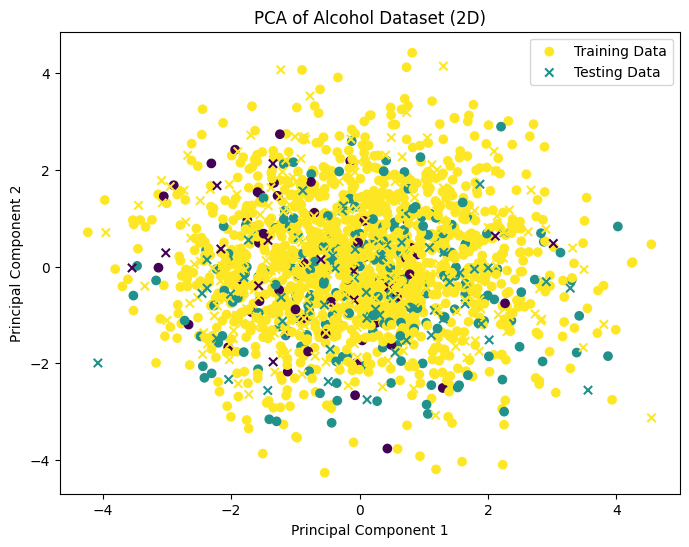

In [101]:

# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming dfalcohol is your DataFrame
# Extract features (X) and target variable (y)
X = dfalcohol.drop('Alcohol', axis=1)
y = dfalcohol['Alcohol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components (2 for visualization)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='Training Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', marker='x', label='Testing Data')
plt.title('PCA of Alcohol Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

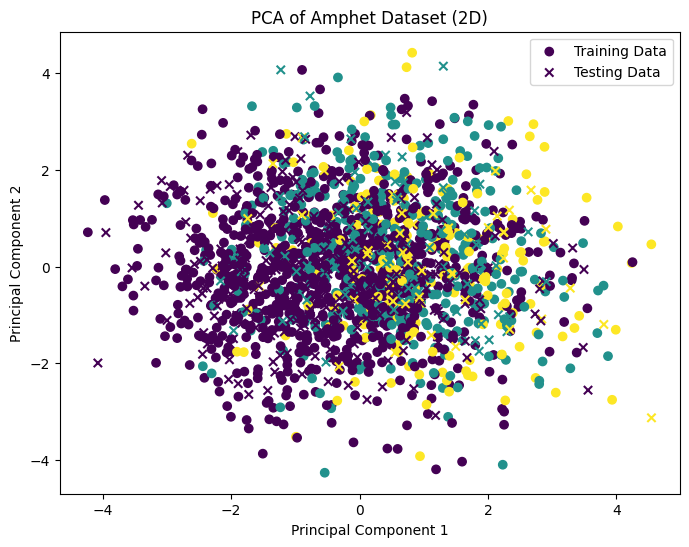

In [102]:

# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Extract features (X) and target variable (y)
X = dfamphet.drop('Amphet', axis=1)
y = dfamphet['Amphet']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components (2 for visualization)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='Training Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', marker='x', label='Testing Data')
plt.title('PCA of Amphet Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

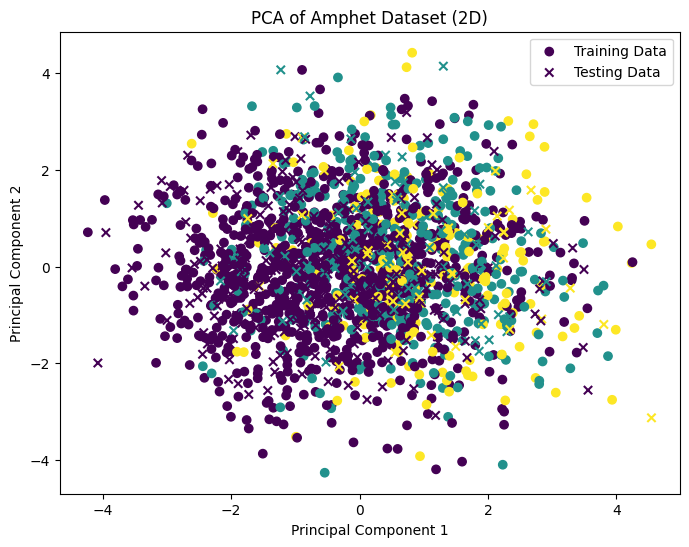

In [103]:

# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Extract features (X) and target variable (y)
X = dfamphet.drop('Amphet', axis=1)
y = dfamphet['Amphet']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=5)  # Specify the number of components (2 for visualization)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='Training Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', marker='x', label='Testing Data')
plt.title('PCA of Amphet Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [104]:
# ALCOHOL 2D PCA

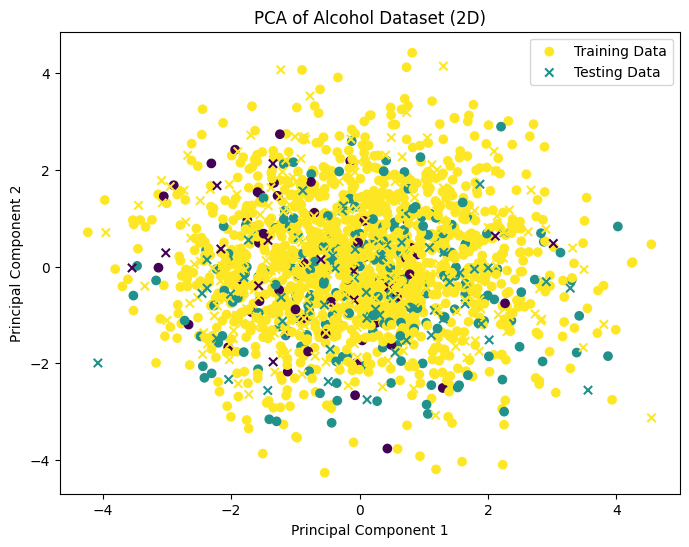

In [105]:

X = dfalcohol.drop('Alcohol', axis=1)
y = dfalcohol['Alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pca = PCA(n_components=2)  # Specify the number of components (2 for visualization)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='Training Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', marker='x', label='Testing Data')
plt.title('PCA of Alcohol Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [106]:
# ALCOHOL 3D PCA

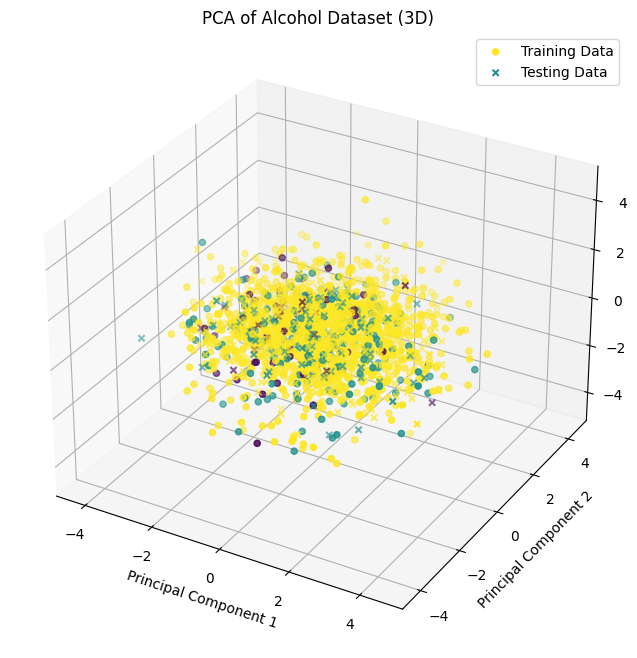

In [107]:

X = dfalcohol.drop('Alcohol', axis=1)
y = dfalcohol['Alcohol']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA with 3 components
pca = PCA(n_components=3)  # Specify the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the data in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter_train = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis', label='Training Data')
scatter_test = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c=y_test, cmap='viridis', marker='x', label='Testing Data')

ax.set_title('PCA of Alcohol Dataset (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

In [108]:
# CHANGING AMPHET 2D PCA N_COMPONENTS NUMBER

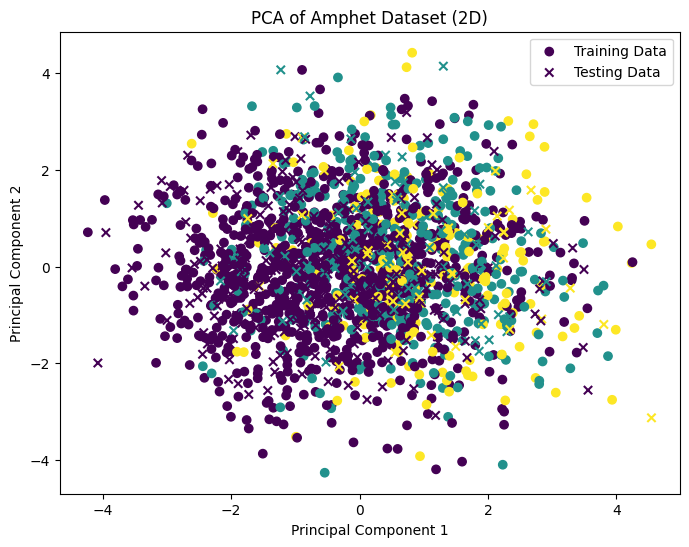

In [109]:
# n components = 2


X = dfamphet.drop('Amphet', axis=1)
y = dfamphet['Amphet']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=2)  # Specify the number of components (2 for visualization)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='Training Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', marker='x', label='Testing Data')
plt.title('PCA of Amphet Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

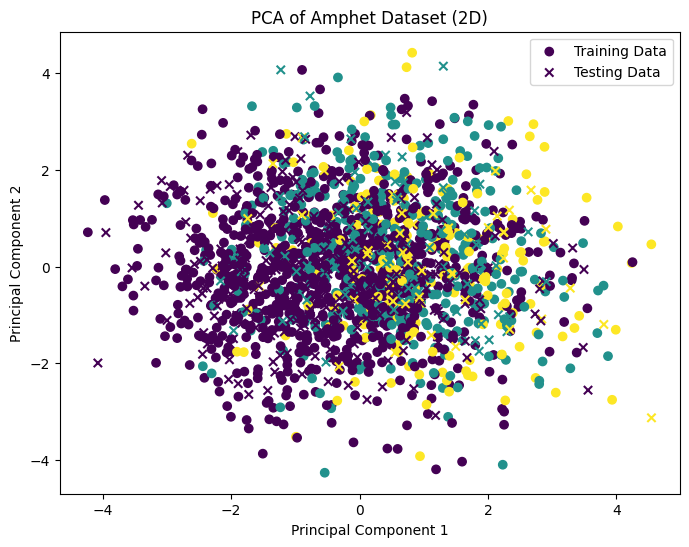

In [110]:
# n components = 5


X = dfamphet.drop('Amphet', axis=1)
y = dfamphet['Amphet']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='Training Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', marker='x', label='Testing Data')
plt.title('PCA of Amphet Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# **Classification for Grouped Drugs**

In [111]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [112]:
list1=['Alcohol',
       'Amphet', 'Amyl', 'Benzos','Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth', 'Mushrooms']

for col in list1:
    data[col] = encoder.fit_transform(data[col])

In [113]:
data["Stimulants"] = data["Amphet"] + data["Coke"] + data["Meth"] + data["Crack"]

data["Depressants"] = data["Alcohol"] + data["Benzos"] + data["Heroin"] + data["Cannabis"] + data["Amyl"]

data["Hallucinogens"] = data["LSD"] + data["Mushrooms"]

data["Party"] = data["Ecstasy"] + data["Ketamine"]

In [114]:
data.columns

Index(['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',
       'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth', 'Mushrooms',
       'Stimulants', 'Depressants', 'Hallucinogens', 'Party'],
      dtype='object')

In [115]:
data[['Stimulants', 'Depressants',
       'Hallucinogens', 'Party']]


,Stimulants,Depressants,Hallucinogens,Party
0,8,11,2,6
1,0,9,1,0
2,2,9,0,2
3,1,8,2,1
4,0,2,0,0
...,...,...,...,...
1879,0,10,3,0
1880,4,8,9,2
1881,10,20,4,6
1882,0,11,6,3


In [116]:
data["Stimulants"].unique()


array([ 8,  0,  2,  1,  3,  4,  7,  6,  5,  9, 10, 12, 11, 16, 13, 14, 15,
       19, 18, 17, 22, 21])

In [117]:
data["Depressants"].unique()


array([11,  9,  8,  2,  7,  5,  4, 12,  1,  6, 10, 13, 15,  0,  3, 16, 19,
       21, 20, 14, 23, 17, 18, 24, 22, 26, 25])

In [118]:
data["Hallucinogens"].unique()


array([ 2,  1,  0,  3,  4,  5,  6,  7,  8,  9, 10, 12, 11])

In [119]:
data["Party"].unique()

array([ 6,  0,  2,  1,  3,  5,  4,  8,  7,  9, 10, 12, 11])

In [120]:
dict2 = {
    0:0,
    1:0,
    2:0,
    3:0,
    4:0,

    5:1,
    6:1,
    7:1,
    8:1,
    9:1,
    10:1,
    11:1,
    12:1,
    13:1,
    14:1,
    15:1,
    16:1,

    17:2,
    18:2,
    19:2,
    20:2,
    21:2,
    22:2,
    23:2,
    24:2,
    25:2,
    26:2,
}


# 0 = NON-USER
# 1 = MED USER
# 2 = HIGH USER



# **STIMULANTS**

In [143]:
dfStimulants = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Stimulants"]]
dfStimulants["Stimulants"].replace(dict2, inplace=True)
dfStimulants

<ipython-input-143-426fb7d01a29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfStimulants["Stimulants"].replace(dict2, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Stimulants
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [146]:
# LOGISTIC REGRESSION

X = dfStimulants.drop('Stimulants', axis=1)  # Features
y = dfStimulants['Stimulants']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

lr_Stimulants = LogisticRegression(max_iter=1000)
lr_Stimulants.fit(X_train, y_train)
lr_Stimulants_y_pred = lr_Stimulants.predict(X_test)

lr_Stimulants_accuracy = accuracy_score(y_test, lr_Stimulants_y_pred)
lr_Stimulants_conf_matrix = confusion_matrix(y_test, lr_Stimulants_y_pred)
lr_Stimulants_classification_rep = classification_report(y_test, lr_Stimulants_y_pred)
print(f'Accuracy: {lr_Stimulants_accuracy}')
print(f'Confusion Matrix:\n{lr_Stimulants_conf_matrix}')
print(f'Classification Report:\n{lr_Stimulants_classification_rep}')

Accuracy: 0.6941489361702128
Confusion Matrix:
[[220  32   0]
 [ 81  41   0]
 [  0   2   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.80       252
           1       0.55      0.34      0.42       122
           2       0.00      0.00      0.00         2

    accuracy                           0.69       376
   macro avg       0.43      0.40      0.40       376
weighted avg       0.67      0.69      0.67       376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
# Coefficients
print("Stimulants Coefficients:", lr_Stimulants.coef_)


Stimulants Coefficients: [[-0.25028111 -0.01532369 -0.17938703  0.51327246  0.07404235 -0.03841689
  -0.45787881]
 [-0.07788297 -0.16643553  0.15976459  0.30442671 -0.10318244  0.1249649
   0.17950746]
 [ 0.32816408  0.18175922  0.01962245 -0.81769917  0.02914009 -0.08654801
   0.27837135]]


In [149]:
# RANDOM FOREST
X = dfStimulants.drop('Stimulants', axis=1)  # Features
y = dfStimulants['Stimulants']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

Stimulants_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
Stimulants_rf_classifier.fit(X_train, y_train)
Stimulants_y_pred_rf = Stimulants_rf_classifier.predict(X_test)

Stimulants_accuracy_rf = accuracy_score(y_test, Stimulants_y_pred_rf)
Stimulants_conf_matrix_rf = confusion_matrix(y_test, Stimulants_y_pred_rf)
Stimulants_classification_rep_rf = classification_report(y_test, Stimulants_y_pred_rf)

print(f'Accuracy: {Stimulants_accuracy_rf}')
print(f'Confusion Matrix:\n{Stimulants_conf_matrix_rf}')
print(f'Classification Report:\n{Stimulants_classification_rep_rf}')

Accuracy: 0.6968085106382979
Confusion Matrix:
[[223  29   0]
 [ 83  39   0]
 [  1   1   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       252
           1       0.57      0.32      0.41       122
           2       0.00      0.00      0.00         2

    accuracy                           0.70       376
   macro avg       0.43      0.40      0.40       376
weighted avg       0.67      0.70      0.67       376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
# GRADIENT BOOSTING

Stimulants_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=9)
Stimulants_gb_classifier.fit(X_train, y_train)
Stimulants_y_pred_gb = Stimulants_gb_classifier.predict(X_test)

Stimulants_accuracy_gb = accuracy_score(y_test, Stimulants_y_pred_gb)
Stimulants_conf_matrix_gb = confusion_matrix(y_test, Stimulants_y_pred_gb)
Stimulants_classification_rep_gb = classification_report(y_test, Stimulants_y_pred_gb)

print(f'Accuracy: {Stimulants_accuracy_gb}')
print(f'Confusion Matrix:\n{Stimulants_conf_matrix_gb}')
print(f'Classification Report:\n{Stimulants_classification_rep_gb}')

Accuracy: 0.6781914893617021
Confusion Matrix:
[[216  36   0]
 [ 83  39   0]
 [  0   2   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       252
           1       0.51      0.32      0.39       122
           2       0.00      0.00      0.00         2

    accuracy                           0.68       376
   macro avg       0.41      0.39      0.39       376
weighted avg       0.65      0.68      0.65       376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **DEPRESSANTS**

In [127]:
dfDepressants = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Depressants"]]
dfDepressants["Depressants"].replace(dict2, inplace=True)
dfDepressants

<ipython-input-127-293ad84f9101>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDepressants["Depressants"].replace(dict2, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Depressants
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,2
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


In [128]:
# LOGISTIC REGRESSION

X = dfDepressants.drop('Depressants', axis=1)  # Features
y = dfDepressants['Depressants']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_Depressants = LogisticRegression(max_iter=1000)
lr_Depressants.fit(X_train, y_train)
lr_Depressants_y_pred = lr_Depressants.predict(X_test)

lr_Depressants_accuracy = accuracy_score(y_test, lr_Depressants_y_pred)
lr_Depressants_conf_matrix = confusion_matrix(y_test, lr_Depressants_y_pred)
lr_Depressants_classification_rep = classification_report(y_test, lr_Depressants_y_pred)
print(f'Accuracy: {lr_Depressants_accuracy}')
print(f'Confusion Matrix:\n{lr_Depressants_conf_matrix}')
print(f'Classification Report:\n{lr_Depressants_classification_rep}')

Accuracy: 0.8324468085106383
Confusion Matrix:
[[  0  34   0]
 [  1 313   3]
 [  0  25   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.84      0.99      0.91       317
           2       0.00      0.00      0.00        25

    accuracy                           0.83       376
   macro avg       0.28      0.33      0.30       376
weighted avg       0.71      0.83      0.77       376



In [129]:
# Coefficients
print("Depressants Coefficients:", lr_Depressants.coef_)


Depressants Coefficients: [[ 0.00708779  0.15638605 -0.37428825  0.10418805  0.25406512 -0.10007965
  -0.60372552]
 [-0.18816262 -0.03520995  0.03464157  0.08104256 -0.06757577 -0.00383899
   0.02325815]
 [ 0.18107483 -0.1211761   0.33964668 -0.18523061 -0.18648935  0.10391864
   0.58046738]]


In [130]:
# RANDOM FOREST
X = dfDepressants.drop('Depressants', axis=1)  # Features
y = dfDepressants['Depressants']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Depressants_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
Depressants_rf_classifier.fit(X_train, y_train)
Depressants_y_pred_rf = Depressants_rf_classifier.predict(X_test)

Depressants_accuracy_rf = accuracy_score(y_test, Depressants_y_pred_rf)
Depressants_conf_matrix_rf = confusion_matrix(y_test, Depressants_y_pred_rf)
Depressants_classification_rep_rf = classification_report(y_test, Depressants_y_pred_rf)

print(f'Accuracy: {Depressants_accuracy_rf}')
print(f'Confusion Matrix:\n{Depressants_conf_matrix_rf}')
print(f'Classification Report:\n{Depressants_classification_rep_rf}')

Accuracy: 0.8351063829787234
Confusion Matrix:
[[  0  34   0]
 [  0 314   3]
 [  0  25   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.84      0.99      0.91       317
           2       0.00      0.00      0.00        25

    accuracy                           0.84       376
   macro avg       0.28      0.33      0.30       376
weighted avg       0.71      0.84      0.77       376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
# GRADIENT BOOSTING

Depressants_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
Depressants_gb_classifier.fit(X_train, y_train)
Depressants_y_pred_gb = Depressants_gb_classifier.predict(X_test)

Depressants_accuracy_gb = accuracy_score(y_test, Depressants_y_pred_gb)
Depressants_conf_matrix_gb = confusion_matrix(y_test, Depressants_y_pred_gb)
Depressants_classification_rep_gb = classification_report(y_test, Depressants_y_pred_gb)

print(f'Accuracy: {Depressants_accuracy_gb}')
print(f'Confusion Matrix:\n{Depressants_conf_matrix_gb}')
print(f'Classification Report:\n{Depressants_classification_rep_gb}')

Accuracy: 0.8191489361702128
Confusion Matrix:
[[  0  33   1]
 [  5 307   5]
 [  0  24   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.84      0.97      0.90       317
           2       0.14      0.04      0.06        25

    accuracy                           0.82       376
   macro avg       0.33      0.34      0.32       376
weighted avg       0.72      0.82      0.76       376



# **HALLUCINOGENS**

In [132]:
dfHallucinogens = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Hallucinogens"]]
dfHallucinogens["Hallucinogens"].replace(dict2, inplace=True)
dfHallucinogens

<ipython-input-132-9b550f6fb44c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHallucinogens["Hallucinogens"].replace(dict2, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Hallucinogens
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


In [133]:
# LOGISTIC REGRESSION

X = dfHallucinogens.drop('Hallucinogens', axis=1)  # Features
y = dfHallucinogens['Hallucinogens']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_Hallucinogens = LogisticRegression(max_iter=1000)
lr_Hallucinogens.fit(X_train, y_train)
lr_Hallucinogens_y_pred = lr_Hallucinogens.predict(X_test)

lr_Hallucinogens_accuracy = accuracy_score(y_test, lr_Hallucinogens_y_pred)
lr_Hallucinogens_conf_matrix = confusion_matrix(y_test, lr_Hallucinogens_y_pred)
lr_Hallucinogens_classification_rep = classification_report(y_test, lr_Hallucinogens_y_pred)
print(f'Accuracy: {lr_Hallucinogens_accuracy}')
print(f'Confusion Matrix:\n{lr_Hallucinogens_conf_matrix}')
print(f'Classification Report:\n{lr_Hallucinogens_classification_rep}')

Accuracy: 0.8138297872340425
Confusion Matrix:
[[289  15]
 [ 55  17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       304
           1       0.53      0.24      0.33        72

    accuracy                           0.81       376
   macro avg       0.69      0.59      0.61       376
weighted avg       0.78      0.81      0.78       376



In [134]:
# Coefficients
print("Hallucinogens Coefficients:", lr_Hallucinogens.coef_)


Hallucinogens Coefficients: [[-0.1762257  -0.23752081  0.80355893 -0.09611454 -0.22665105 -0.1355669
   0.63151108]]


In [135]:
# RANDOM FOREST
X = dfHallucinogens.drop('Hallucinogens', axis=1)  # Features
y = dfHallucinogens['Hallucinogens']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hallucinogens_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
Hallucinogens_rf_classifier.fit(X_train, y_train)
Hallucinogens_y_pred_rf = Hallucinogens_rf_classifier.predict(X_test)

Hallucinogens_accuracy_rf = accuracy_score(y_test, Hallucinogens_y_pred_rf)
Hallucinogens_conf_matrix_rf = confusion_matrix(y_test, Hallucinogens_y_pred_rf)
Hallucinogens_classification_rep_rf = classification_report(y_test, Hallucinogens_y_pred_rf)

print(f'Accuracy: {Hallucinogens_accuracy_rf}')
print(f'Confusion Matrix:\n{Hallucinogens_conf_matrix_rf}')
print(f'Classification Report:\n{Hallucinogens_classification_rep_rf}')

Accuracy: 0.8031914893617021
Confusion Matrix:
[[286  18]
 [ 56  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       304
           1       0.47      0.22      0.30        72

    accuracy                           0.80       376
   macro avg       0.65      0.58      0.59       376
weighted avg       0.77      0.80      0.77       376



In [136]:
# GRADIENT BOOSTING

Hallucinogens_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
Hallucinogens_gb_classifier.fit(X_train, y_train)
Hallucinogens_y_pred_gb = Hallucinogens_gb_classifier.predict(X_test)

Hallucinogens_accuracy_gb = accuracy_score(y_test, Hallucinogens_y_pred_gb)
Hallucinogens_conf_matrix_gb = confusion_matrix(y_test, Hallucinogens_y_pred_gb)
Hallucinogens_classification_rep_gb = classification_report(y_test, Hallucinogens_y_pred_gb)

print(f'Accuracy: {Hallucinogens_accuracy_gb}')
print(f'Confusion Matrix:\n{Hallucinogens_conf_matrix_gb}')
print(f'Classification Report:\n{Hallucinogens_classification_rep_gb}')

Accuracy: 0.8058510638297872
Confusion Matrix:
[[284  20]
 [ 53  19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       304
           1       0.49      0.26      0.34        72

    accuracy                           0.81       376
   macro avg       0.66      0.60      0.61       376
weighted avg       0.77      0.81      0.78       376



# **PARTY**

In [137]:
dfParty = data[['Nscore','Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS',"Party"]]
dfParty["Party"].replace(dict2, inplace=True)
dfParty

<ipython-input-137-32b6ffa53fbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfParty["Party"].replace(dict2, inplace=True)


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Party
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [138]:
# LOGISTIC REGRESSION

X = dfParty.drop('Party', axis=1)  # Features
y = dfParty['Party']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_Party = LogisticRegression(max_iter=1000)
lr_Party.fit(X_train, y_train)
lr_Party_y_pred = lr_Party.predict(X_test)

lr_Party_accuracy = accuracy_score(y_test, lr_Party_y_pred)
lr_Party_conf_matrix = confusion_matrix(y_test, lr_Party_y_pred)
lr_Party_classification_rep = classification_report(y_test, lr_Party_y_pred)
print(f'Accuracy: {lr_Party_accuracy}')
print(f'Confusion Matrix:\n{lr_Party_conf_matrix}')
print(f'Classification Report:\n{lr_Party_classification_rep}')

Accuracy: 0.8324468085106383
Confusion Matrix:
[[313   4]
 [ 59   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       317
           1       0.00      0.00      0.00        59

    accuracy                           0.83       376
   macro avg       0.42      0.49      0.45       376
weighted avg       0.71      0.83      0.77       376



In [139]:
# Coefficients
print("Party Coefficients:",lr_Party.coef_)


Party Coefficients: [[-0.01803604  0.00597041  0.36093445 -0.14098867 -0.17112777  0.10512665
   0.51465635]]


In [140]:
# RANDOM FOREST
X = dfParty.drop('Party', axis=1)  # Features
y = dfParty['Party']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Party_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
Party_rf_classifier.fit(X_train, y_train)
Party_y_pred_rf = Party_rf_classifier.predict(X_test)

Party_accuracy_rf = accuracy_score(y_test, Party_y_pred_rf)
Party_conf_matrix_rf = confusion_matrix(y_test, Party_y_pred_rf)
Party_classification_rep_rf = classification_report(y_test, Party_y_pred_rf)

print(f'Accuracy: {Party_accuracy_rf}')
print(f'Confusion Matrix:\n{Party_conf_matrix_rf}')
print(f'Classification Report:\n{Party_classification_rep_rf}')

Accuracy: 0.8377659574468085
Confusion Matrix:
[[315   2]
 [ 59   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       317
           1       0.00      0.00      0.00        59

    accuracy                           0.84       376
   macro avg       0.42      0.50      0.46       376
weighted avg       0.71      0.84      0.77       376



In [141]:
# GRADIENT BOOSTING

Party_gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
Party_gb_classifier.fit(X_train, y_train)
Party_y_pred_gb = Party_gb_classifier.predict(X_test)

Party_accuracy_gb = accuracy_score(y_test, Party_y_pred_gb)
Party_conf_matrix_gb = confusion_matrix(y_test, Party_y_pred_gb)
Party_classification_rep_gb = classification_report(y_test, Party_y_pred_gb)

print(f'Accuracy: {Party_accuracy_gb}')
print(f'Confusion Matrix:\n{Party_conf_matrix_gb}')
print(f'Classification Report:\n{Party_classification_rep_gb}')

Accuracy: 0.8404255319148937
Confusion Matrix:
[[313   4]
 [ 56   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       317
           1       0.43      0.05      0.09        59

    accuracy                           0.84       376
   macro avg       0.64      0.52      0.50       376
weighted avg       0.78      0.84      0.78       376

